# Homework 2: Logistic Regression

## Avery Peiffer

In [97]:
import numpy as np
import os
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
synthetic_files = ['synthetic1.mat', 'synthetic2.mat', 'synthetic3.mat', 'synthetic4.mat']

methods = ['Gradient Descent', 'Newton\'s Method', 'Stochastic Gradient Descent']

In [163]:
def load_data(file):
    print('Synthetic file: ', synth_file)
    data = loadmat(os.getcwd() + '\data\\' + synth_file)
    X, Y = np.transpose(data['X']), data['Y'][0]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
    scaler = StandardScaler().fit(X_train)
    
    X_train_t = scaler.transform(X_train)
    X_test_t = scaler.transform(X_test)
    
    return X_train_t, X_test_t, Y_train, Y_test

def sigmoid(val, b0, b1, b2):
    x1 = val[0]
    x2 = val[1]
    
    z = (b0 + x1*b1 + x2*b2).astype("float_")
    return 1.0 / (1.0 + np.exp(-z))

def plot_loss(its, rss, method, epochs):
    plt.scatter(its, rss)
    plt.xlabel('Epoch')
    plt.ylabel('RSS value')
    plt.title(f'RSS values from 0-{epochs} iterations of {method}')
    plt.show()

def eval_model(X, Y, b0, b1, b2):
    y_pred = []
    
    for val in X:
        res = sigmoid(val, b0, b1, b2)
        
        if res > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    acc = np.count_nonzero(y_pred == Y) / len(Y)
    print('Accuracy = %.4f' % acc)

def predict(X, b0, b1, b2):
    l = []

    for val in X:
        l.append(sigmoid(val, b0, b1, b2))

    return np.asarray(l)

### Part 1: Gradient Descent

In [166]:
def log_reg_gd(X, Y, alpha):    
    rand_multiplier = 30
    b0 = rand_multiplier * np.random.rand()
    b1 = rand_multiplier * np.random.rand()
    b2 = rand_multiplier * np.random.rand()

    its = []
    rss = []
    
    n = 300

    for i in range(0, n):
        b_0_sum = 0
        b_1_sum = 0
        b_2_sum = 0
        running_rss = 0

        for j in range(0, len(X)):
            x1 = X[j][0]
            x2 = X[j][1]
            
            inside_deriv = sigmoid(X[j], b0, b1, b2) - Y[j]
            b_0_sum += inside_deriv
            b_1_sum += x1*inside_deriv
            b_2_sum += x2*inside_deriv
            running_rss += inside_deriv ** 2
       
        its.append(i)
        rss.append(running_rss)

        deriv_b0 = 2 * b_0_sum
        deriv_b1 = 2 * b_1_sum
        deriv_b2 = 2 * b_2_sum

        b0 = b0 - alpha * deriv_b0
        b1 = b1 - alpha * deriv_b1
        b2 = b2 - alpha * deriv_b2

    plot_loss(its, rss, methods[0], n)
    return b0, b1, b2

Synthetic file:  synthetic1.mat


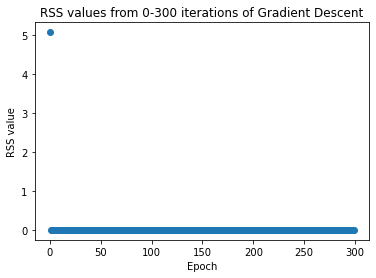

Learning rate:  1
Coefficients:  13.079343815578929 28.353810066236438 31.781605096946755
Accuracy = 0.9800


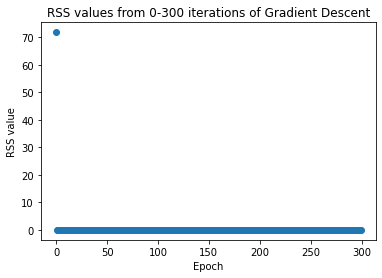

Learning rate:  0.1
Coefficients:  12.910818037492438 19.854557866573202 26.902405140676393
Accuracy = 0.9800


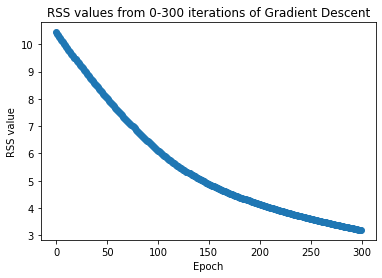

Learning rate:  0.001
Coefficients:  21.965593611966106 27.67746572546228 15.274773169188467
Accuracy = 0.9200
Synthetic file:  synthetic2.mat


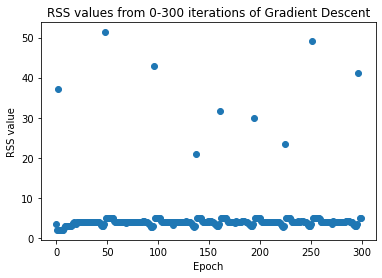

Learning rate:  1
Coefficients:  -80.96962438254326 89.39367532243108 87.12453540853507
Accuracy = 0.9800


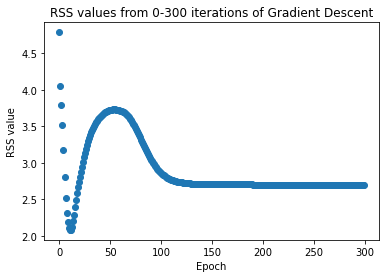

Learning rate:  0.1
Coefficients:  -0.03523793504654528 0.15721509502953698 5.47057392013084
Accuracy = 1.0000


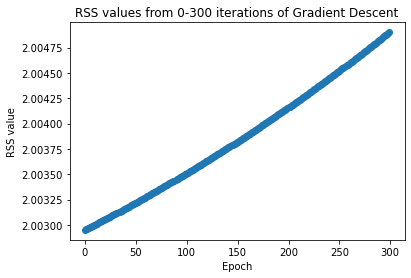

Learning rate:  0.001
Coefficients:  6.195610535811201 24.02804502391817 13.303392435177633
Accuracy = 0.9800
Synthetic file:  synthetic3.mat


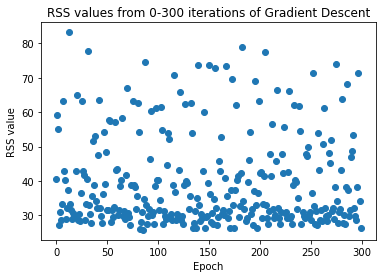

Learning rate:  1
Coefficients:  -5.620660286222316 3.172495857598303 47.06601651853519
Accuracy = 0.8400


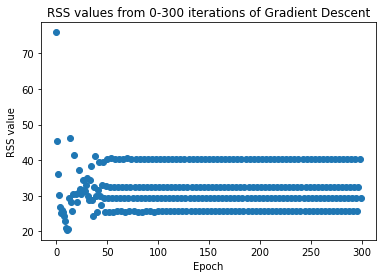

Learning rate:  0.1
Coefficients:  1.9000770898595887 2.4903653151212177 4.3063729278898535
Accuracy = 0.8600


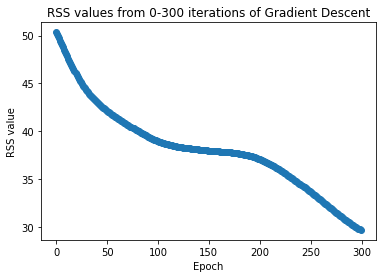

Learning rate:  0.001
Coefficients:  9.068355082028203 12.640602380511242 21.84740939032938
Accuracy = 0.8600
Synthetic file:  synthetic4.mat


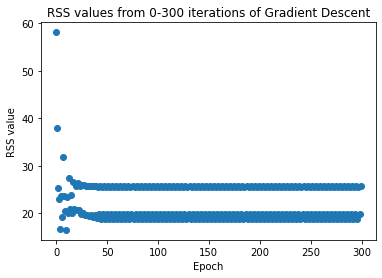

Learning rate:  1
Coefficients:  -47.329225405140484 73.38591118783454 70.24146078348164
Accuracy = 0.8200


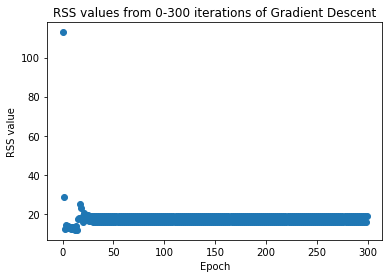

Learning rate:  0.1
Coefficients:  -4.673117959007634 6.740810506868594 6.7917419450197265
Accuracy = 0.8200


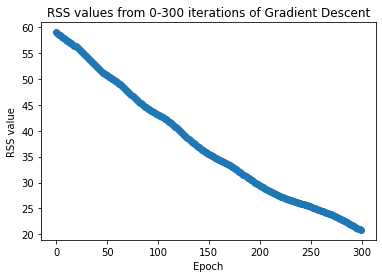

Learning rate:  0.001
Coefficients:  -5.488371813126509 9.04158004048527 12.975911045403867
Accuracy = 0.7800


In [167]:
for synth_file in synthetic_files:
    X_train, X_test, Y_train, Y_test = load_data(synth_file)
    
    lrs = [1, 0.1, 0.001]
    
    for alpha in lrs:
        b0, b1, b2 = log_reg_gd(X_train, Y_train, alpha)
        print('Learning rate: ', alpha)
        print('Coefficients: ', b0, b1, b2)
        eval_model(X_test, Y_test, b0, b1, b2)

### Part 2: Newton's Method

In [168]:
def log_reg_newton(X, Y):
    rand_multiplier = 30
    b0 = rand_multiplier * np.random.rand()
    b1 = rand_multiplier * np.random.rand()
    b2 = rand_multiplier * np.random.rand()

    its = []
    rss = []
    
    n = 300

    for i in range(0, n):
        b0_grad = 0
        b1_grad = 0
        b2_grad = 0
        hess = np.zeros((3, 3))
        running_rss = 0

        for j in range(0, len(X)):
            x1 = X[j][0]
            x2 = X[j][1]
            
            arr = np.asarray([[1], [x1], [x2]])
            mat = np.matmul(arr, arr.T)
            
            res = sigmoid(X[j], b0, b1, b2)
            
            hess += -1*mat*res*(1-res)
            
            inside_deriv = res - Y[j]
            b0_grad += inside_deriv
            b1_grad += x1*inside_deriv
            b2_grad += x2*inside_deriv
            running_rss += inside_deriv ** 2
            
        its.append(i)
        rss.append(running_rss)
        
        b0_grad = 2 * b0_grad
        b1_grad = 2 * b1_grad
        b2_grad = 2 * b2_grad
        
        grads = np.asarray([b0_grad, b1_grad, b2_grad])

        hess_inv = np.linalg.pinv(hess)
        final = np.matmul(hess_inv, grads)
        
        
        b0 = b0 + final[0]
        b1 = b1 + final[1]
        b2 = b2 + final[2]

    plot_loss(its, rss, methods[1], n)
    return b0, b1, b2

Synthetic file:  synthetic1.mat


<ipython-input-163-54ca098e6a95>:19: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


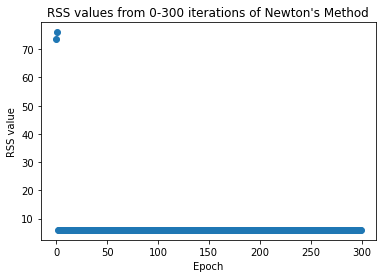

Coefficients:  -1.4578038282879412e+170 6.749764942173545e+169 2.1895175511800848e+170
Accuracy = 1.0000
Synthetic file:  synthetic2.mat


<ipython-input-163-54ca098e6a95>:19: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


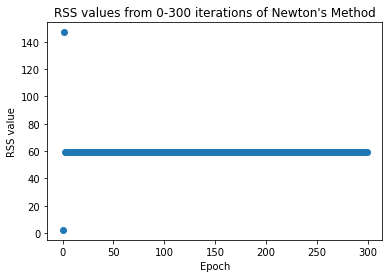

Coefficients:  -7.343464629696663e+156 4.833803789199834e+156 1.6475546912270793e+156
Accuracy = 0.5600
Synthetic file:  synthetic3.mat


<ipython-input-163-54ca098e6a95>:19: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


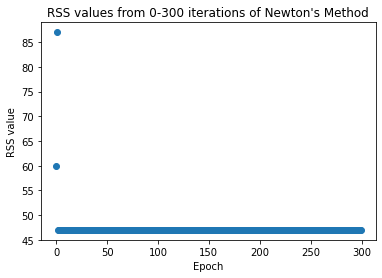

Coefficients:  -760547984907610.9 272942546466232.2 1001336619147507.8
Accuracy = 0.7400
Synthetic file:  synthetic4.mat


<ipython-input-163-54ca098e6a95>:19: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


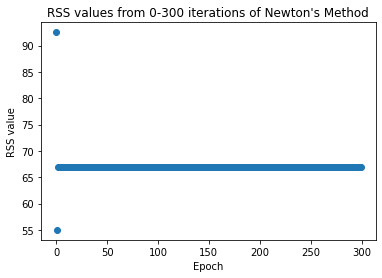

Coefficients:  39723853494965.96 113369134552981.55 -79377696865255.97
Accuracy = 0.6200


In [171]:
for synth_file in synthetic_files:    
    X_train, X_test, Y_train, Y_test = load_data(synth_file)
    
    b0, b1, b2 = log_reg_newton(X_train, Y_train)
    print('Coefficients: ', b0, b1, b2)
    eval_model(X_test, Y_test, b0, b1, b2)

### Part 3: Stochastic Gradient Descent

In [174]:
def log_reg_sgd(X, Y, alpha):    
    rand_multiplier = 30
    b0 = rand_multiplier * np.random.rand()
    b1 = rand_multiplier * np.random.rand()
    b2 = rand_multiplier * np.random.rand()

    its = []
    rss = []
    
    n = 300

    for i in range(0, n):
        b_0_sum = 0
        b_1_sum = 0
        b_2_sum = 0
        running_rss = 0
        
        j = np.random.randint(0, len(X))

        x1 = X[j][0]
        x2 = X[j][1]

        inside_deriv = sigmoid(X[j], b0, b1, b2) - Y[j]
        b_0_sum += inside_deriv
        b_1_sum += x1*inside_deriv
        b_2_sum += x2*inside_deriv
        running_rss += inside_deriv ** 2
       
        its.append(i)
        rss.append(running_rss)

        deriv_b0 = 2 * b_0_sum
        deriv_b1 = 2 * b_1_sum
        deriv_b2 = 2 * b_2_sum

        b0 = b0 - alpha * deriv_b0
        b1 = b1 - alpha * deriv_b1
        b2 = b2 - alpha * deriv_b2

    plot_loss(its, rss, methods[2], n)
    return b0, b1, b2

Synthetic file:  synthetic1.mat


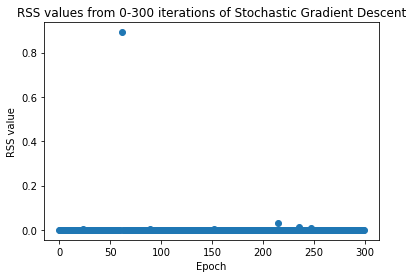

Learning rate:  1
Coefficients:  16.66189314433525 29.339382243253358 16.397560415819882
Accuracy = 0.9600


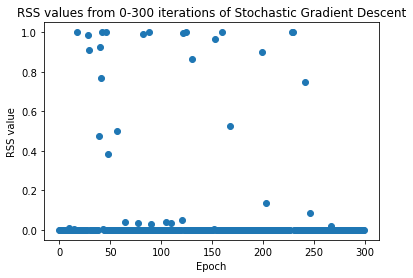

Learning rate:  0.1
Coefficients:  22.350709291224515 28.138571817062896 10.44481511497197
Accuracy = 0.9000


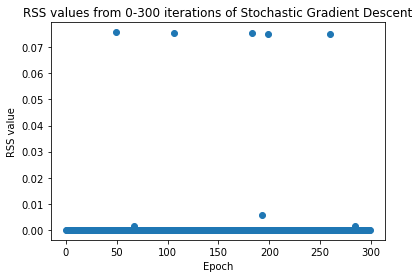

Learning rate:  0.001
Coefficients:  5.208807067395004 5.718205273403954 18.28211293727614
Accuracy = 1.0000
Synthetic file:  synthetic2.mat


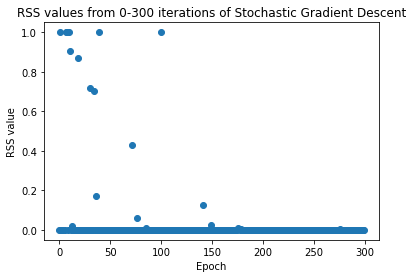

Learning rate:  1
Coefficients:  4.785436653539398 7.856753427025232 11.576438895553029
Accuracy = 1.0000


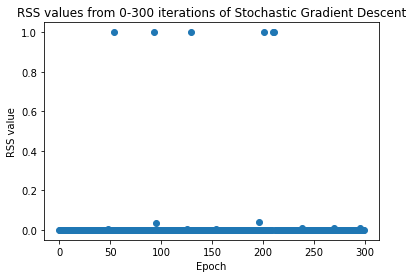

Learning rate:  0.1
Coefficients:  9.88644759615413 10.599222404891796 16.17247677873872
Accuracy = 0.9800


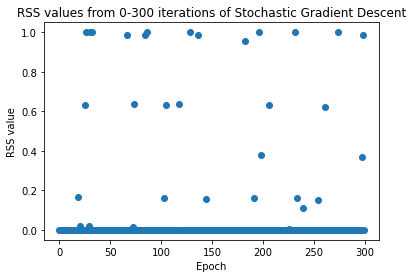

Learning rate:  0.001
Coefficients:  27.06890162076725 24.34954737276357 16.08626548951031
Accuracy = 0.9000
Synthetic file:  synthetic3.mat


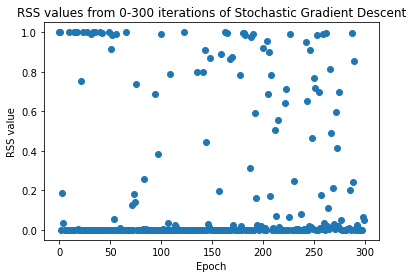

Learning rate:  1
Coefficients:  -0.2978482084718319 -1.140996390549424 4.368752841674246
Accuracy = 0.8600


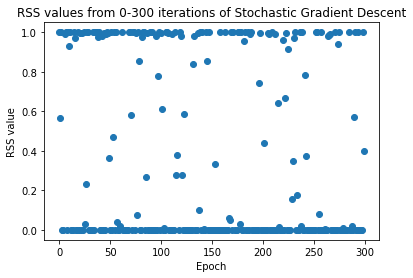

Learning rate:  0.1
Coefficients:  4.681421845453674 11.107478326935253 8.73347395966192
Accuracy = 0.7400


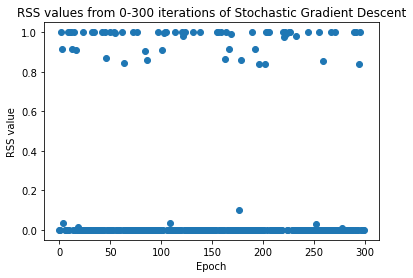

Learning rate:  0.001
Coefficients:  6.7468657822076175 25.242893783362465 21.036089647906735
Accuracy = 0.7800
Synthetic file:  synthetic4.mat


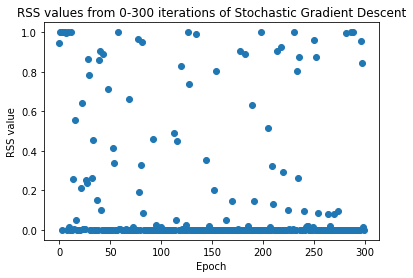

Learning rate:  1
Coefficients:  -4.929699482790543 3.7159443216309214 7.519333663131973
Accuracy = 0.8200


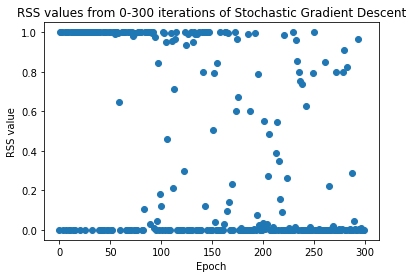

Learning rate:  0.1
Coefficients:  -3.3968527030381717 3.09033401711249 2.771255258042426
Accuracy = 0.8800


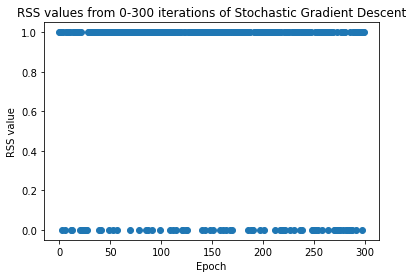

Learning rate:  0.001
Coefficients:  28.637386081280816 0.48412176342256835 11.856317563683959
Accuracy = 0.2600


In [175]:
for synth_file in synthetic_files:    
    X_train, X_test, Y_train, Y_test = load_data(synth_file)
    
    lrs = [1, 0.1, 0.001]
    
    for alpha in lrs:
        b0, b1, b2 = log_reg_sgd(X_train, Y_train, alpha)
        print('Learning rate: ', alpha)
        print('Coefficients: ', b0, b1, b2)
        eval_model(X_test, Y_test, b0, b1, b2)